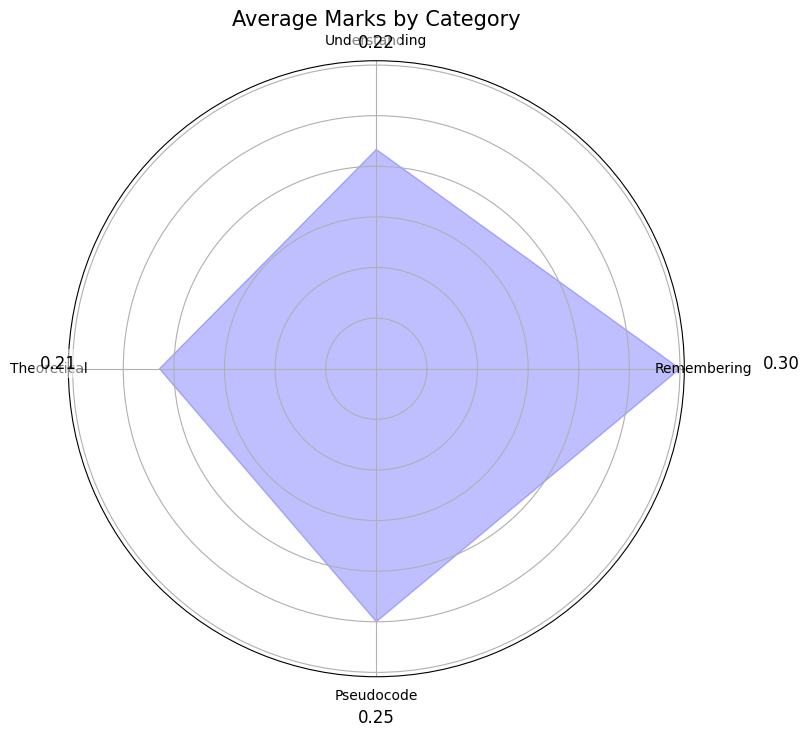

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the quiz and test response CSV files
quiz_df = pd.read_csv('Module1_Notes_to_Quiz/quiz.csv')
test_response_df = pd.read_csv('Module2_Quiz_Analysis/Test_Responce.csv')


# Initialize a dictionary to hold total marks and counts for each category
category_marks = {
    'Remembering': {'total': 0, 'count': 0},
    'Understanding': {'total': 0, 'count': 0},
    'Theoretical': {'total': 0, 'count': 0},
    'Pseudocode': {'total': 0, 'count': 0}
}

# Extract the categories and correct answers
for _, row in quiz_df.iterrows():
    question = row['Question']
    correct_answer = row['Correct Answer'].strip()
    
    # Find the category based on the question text
    if '(Remembering)' in question:
        category = 'Remembering'
    elif '(Understanding)' in question:
        category = 'Understanding'
    elif '(Theoretical)' in question:
        category = 'Theoretical'
    elif '(Pseudocode)' in question:
        category = 'Pseudocode'
    
    # Check the answers in test_response_df
    for _, response in test_response_df.iterrows():
        student_response = response[question].strip()
        
        # Increment the total for the category regardless of the answer
        category_marks[category]['count'] += 1
        
        # Increment the total marks if the response is correct
        if student_response == correct_answer:
            category_marks[category]['total'] += 1

# Calculate average marks for each category
average_marks = []
for category in category_marks.keys():
    if category_marks[category]['count'] > 0:
        average = category_marks[category]['total'] / category_marks[category]['count']
    else:
        average = 0  # If no responses, average is 0
    average_marks.append(average)

# Prepare data for the spider chart
categories = list(category_marks.keys())
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
average_marks += average_marks[:1]  # Close the circle
angles += angles[:1]

# Create a spider chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, average_marks, color='blue', alpha=0.25)
ax.set_yticklabels([])  # Hide radial ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add labels with the average marks, spaced out
for i, value in enumerate(average_marks[:-1]):
    angle_rad = angles[i]
    # Adjust the label position to avoid overlap
    label_offset = 0.1  # Distance from the edge of the chart
    ax.text(angle_rad, value + label_offset, f"{value:.2f}", 
            horizontalalignment='center', size=12, 
            bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# Add a title
plt.title('Average Marks by Category', size=15)
plt.show()

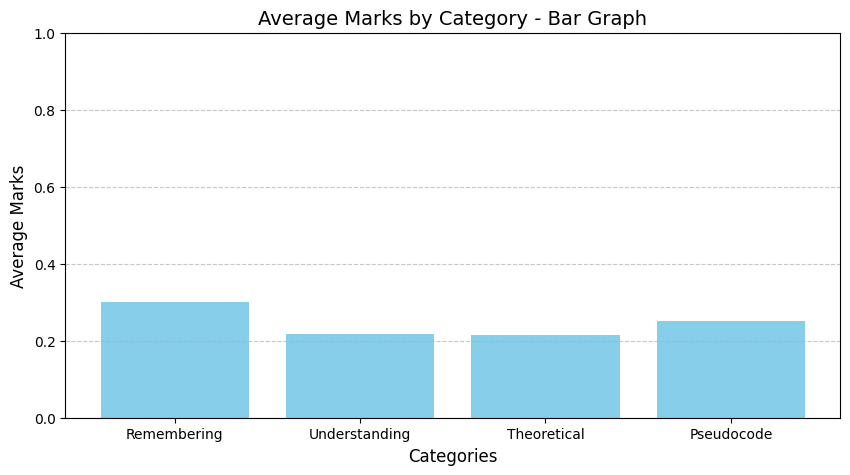

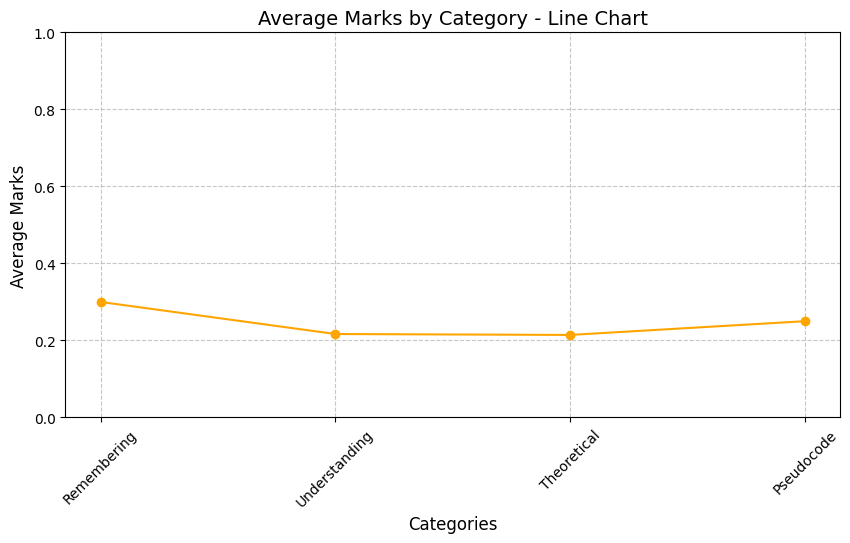

In [12]:
# Calculate average marks for each category
average_marks = []
categories = list(category_marks.keys())
for category in categories:
    if category_marks[category]['count'] > 0:
        average = category_marks[category]['total'] / category_marks[category]['count']
    else:
        average = 0  # If no responses, average is 0
    average_marks.append(average)

# Bar Graph
plt.figure(figsize=(10, 5))
plt.bar(categories, average_marks, color='skyblue')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Average Marks', fontsize=12)
plt.title('Average Marks by Category - Bar Graph', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Line Chart
plt.figure(figsize=(10, 5))
plt.plot(categories, average_marks, marker='o', linestyle='-', color='orange')
plt.xlabel('Categories', fontsize=12)
plt.ylabel('Average Marks', fontsize=12)
plt.title('Average Marks by Category - Line Chart', fontsize=14)
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()